# Student ID: XXX

**You student_id is your 7/8 digit faser number.**

This is a sample format for CE807-SU: Assignment 2. You must follow the format.
The code will have three broad sections, and additional section, if needed,


1.   Common Codes
2.   UnSupervised Training Codes
3.   Other Method/model Codes, if any

**You must have `train_method` This will be evaluated automatically, without this your code will fail and no marked.**

You code should be proverly indended, print as much as possible, follow standard coding (https://peps.python.org/pep-0008/) and documentaion (https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/01.01-Help-And-Documentation.ipynb) practices.

Before each `code cell`, you must have a `text cell` which explain what code cell is going to do. For each function/class, you need to properly document what are it's input, functionality and output.

If you are using any non-standard library, you must have command to install that, for example `pip install datasets`.

You must print `train`, `validation` and `test` performance measures.

You must also print `train` and `validation` loss in each `epoch`, wherever you are using `epoch`, say in any deep learning algorithms.

Your code must

*   To reproducibality of the results you must use a `seed`, you have to set seed in `torch`, `numpy` etc, use same seed everywhere **and your Student ID should be your seed**.
*   read dataset from './CE807-SU/Assignment2/student_id/' folder which will have 3 files [`train.csv`, `val.csv`, `test.csv`]
*   save model after finishing the training in './CE807-SU/Assignment2/student_id/models/XXX/' where XXX = [1,2]
*   at testing time you will load models from './CE807-SU/Assignment2/student_id/models/XXX/' where XXX = [1,2] and then test on your data, and save the output in the same folder

*   **Your output file based on the test file will be named `output_test.csv` and will have the existing columns from test.csv and `out_label`** You need to save file in the respective model folders.




**Install and import all required libraries first before starting to code.**








Let's install all require libraries. For example, `transformers`

Let's import all require libraries.
For example, `numpy`

**Let's put your student id as a variable, that you will use different places**

In [ ]:
student_id = 2214000 # Note this is an interger and you need to input your id

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Let's set `seed` for all libraries like `torch`, `numpy` etc as my student id

In [ ]:
# set same seeds for all libraries
import numpy as np
#numpy seed
seed= np.random.seed(student_id)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
!pip install transformers

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Setup Code
Before getting started we need to run some boilerplate code to set up our environment. You'll need to rerun this setup code each time you start the notebook.

First, run this cell load the [autoreload](https://ipython.readthedocs.io/en/stable/config/extensions/autoreload.html?highlight=autoreload) extension. This allows us to edit `.py` source files, and re-import them into the notebook for a seamless editing and debugging experience.

In [ ]:
import os
import pandas as pd

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


**Let's first allow the GDrive access and set data and model paths**

For examples,

student_id = 1234567

set GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = ‘./CE807-SU/Assignment2/student_id/’ in your GDrive

now set all global variable,


train_file = os.path.join(GOOGLE_DRIVE_PATH_AFTER_MYDRIVE, 'train.csv')

MODEL_2_DIRECTORY = os.path.join('gdrive', 'MyDrive', GOOGLE_DRIVE_PATH, ‘models’, ‘1’)


model_1_output_test_file = os.path.join(MODEL_2_DIRECTORY,'output_test.csv')

Sample output directory and file structure: https://drive.google.com/drive/folders/1ohkXpVvXCl3vJpWGhSlgjqjsno27O5KP?usp=sharing

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pexpect/popen_spawn.py:60: DeprecationWarning: setDaemon() is deprecated, set the daemon attribute instead
  self._read_thread.setDaemon(True)


Mounted at /content/gdrive


In [ ]:
pip install MiniSom


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Import Necessary libraries

In [ ]:
import sys
import gensim
from gensim import corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel, LdaModel
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.cluster import MiniBatchKMeans
from minisom import MiniSom
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.inspection import permutation_importance

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Add your code to initialize GDrive and data and models paths

# TODO: Fill in the Google Drive path where you uploaded the assignment, data and code
# Example: If your student_id is 1234567 then your directory will be './CE807-SU/Assignment2/1234567/'

GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = os.path.join('./CE807-SU/Assignment2/',str(student_id)) # Make sure to update with your student_id and student_id is an integer
GOOGLE_DRIVE_PATH = os.path.join('gdrive', 'MyDrive', GOOGLE_DRIVE_PATH_AFTER_MYDRIVE)
sys.path.append(GOOGLE_DRIVE_PATH)
print('List files: ', os.listdir(GOOGLE_DRIVE_PATH))

train_file = os.path.join(GOOGLE_DRIVE_PATH, 'train.csv')
print('Train file: ', train_file)

val_file= os.path.join(GOOGLE_DRIVE_PATH, 'valid.csv')
print('Valid file: ', val_file)

MODEL_2_DIRECTORY = os.path.join(GOOGLE_DRIVE_PATH, 'models', '2') # Model 2 directory
print('Model 2 directory: ', MODEL_2_DIRECTORY)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


List files:  ['trainUnSup.ipynb', 'test.csv', 'train.csv', 'valid.csv', '__pycache__', 'models', 'common_code.py', 'trainSup.ipynb', 'testSup.ipynb', 'testUnSup.ipynb']
Train file:  gdrive/MyDrive/./CE807-SU/Assignment2/2214000/train.csv
Valid file:  gdrive/MyDrive/./CE807-SU/Assignment2/2214000/valid.csv
Model 2 directory:  gdrive/MyDrive/./CE807-SU/Assignment2/2214000/models/2


# Common Codes

You will write all common codes in `common_code.py` file and use train/test for both models, for examples


*   Data read
*   Performance Matrics
*   Print Dataset Statistics
*   Saving model and output (during training)
*   Loading Model and output (during testing)
*   etc




In [ ]:
from common_code import read_csv_dataset,prepare_dataset_nn,prepare_dataset,calculate_dataset_details,compute_performance,load_model,text_preprocessing,save_model,create_feature_matrix,lemmatized_text,preprocess_and_topic_model,get_dominant_topic,save_label_encoder,save_lda_model_and_dictionary,save_model_hypertuning,balance_dataset,collate_batch,HateSpeechClassificationMLP,HateSpeechClassificationMLPDataset,save_model_nn,predict,augment_data,prepare_dataset,save_model_machine_learning,predict

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#UnSupervised Method Start (Method 1)

In this section you will write all details of your Method 1.

You will have to enter multiple `code` and `text` cell.

Your code should follow the standard ML pipeline


*   Data reading
*   Data clearning, if any
*   Convert data to vector/tokenization/vectorization
*   Model Declaration/Initialization/building
*   Training and validation of the model using training and validation dataset
*   Save the trained model
*   Load and Test the model on testing set
*   Save the output of the model


You could add any other step(s) based on your method's requirement.

After finishing the above, you need to usd splited data as defined in the assignment and then do the same for all 4 sets. Your code should not be copy-pasted 4 time, make use of `function`.


**Data Reading**

**Let's see train file**

In [ ]:
train_df = read_csv_dataset(train_file)

Read  gdrive/MyDrive/./CE807-SU/Assignment2/2214000/train.csv
                    id                                               text  \
0  1161144195366543360  Show me love, show me fuckin love cause I thou...   
1  1188164555660316672             @USER Why does the @USER hate defense?   
2  1186400070209560577  @USER I know they aren’t the same but that doe...   
3  1159880652306702336                     @USER She cute as fuck right 😬   
4  1187350808461008896  @USER That why those frauds Ebuka and co brush...   

  label  
0   NOT  
1   NOT  
2   NOT  
3   OFF  
4   NOT  


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
train_df.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(2800, 3)

**Let's see valid file**

In [ ]:
val_df = read_csv_dataset(val_file)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Read  gdrive/MyDrive/./CE807-SU/Assignment2/2214000/valid.csv
                    id                                               text  \
0  1159587382963908608  My life is nothing what I expected it to be at...   
1  1161558433352605696  that bitch is talking about toxic people when ...   
2  1186120727596015616  I didn’t realize Texas had so many tornados un...   
3  1161424541995847682    @USER Why you tweeting this filth at this hour?   
4  1186135948179886080         @USER Don't get lost in The World Wide Web   

  label  
0   NOT  
1   OFF  
2   NOT  
3   NOT  
4   NOT  


**Class distribution in train set**

In [ ]:
# Access the 'label' column
label = train_df['label'].to_numpy()

unique, counts = np.unique(label, return_counts=True)

print("Total number of tweets: " + str(label.size))
for i in range(len(unique)):
    print("Class " + str(unique[i]) + " has " + str(counts[i]) + " tweets.")

Total number of tweets: 2800
Class NOT has 2693 tweets.
Class OFF has 107 tweets.


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


There is a clear class imbalance that is visible. When compared to Class "OFF," Class "NOT" has a significantly higher number of tweets, indicating strong dominance.

## Data cleaning

In [ ]:
train_df.info()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2800 entries, 0 to 2799
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2800 non-null   int64 
 1   text    2800 non-null   object
 2   label   2800 non-null   object
dtypes: int64(1), object(2)
memory usage: 65.8+ KB


**No missing values found.**

 ## Text preprocessing

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
# Mapping of label values to numeric values
label_mapping = {'NOT': 0, 'OFF': 1}

# Convert 'label' column to numeric form
train_df['label'] = train_df['label'].map(label_mapping)
val_df['label'] = val_df['label'].map(label_mapping)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


**The function text_preprocessing() performs tokenization, lowercasing, noise removal, and stop words removal on a single text input, storing the preprocessed text in a new column called 'preprocessed_text'.**

In [ ]:
# Apply text preprocessing to the 'text' column
train_df['preprocessed_text'] = train_df['text'].apply(text_preprocessing)
val_df['preprocessed_text'] = val_df['text'].apply(text_preprocessing)

# Display the preprocessed data
print(train_df.head())
print(val_df.head())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


                    id                                               text  \
0  1161144195366543360  Show me love, show me fuckin love cause I thou...   
1  1188164555660316672             @USER Why does the @USER hate defense?   
2  1186400070209560577  @USER I know they aren’t the same but that doe...   
3  1159880652306702336                     @USER She cute as fuck right 😬   
4  1187350808461008896  @USER That why those frauds Ebuka and co brush...   

   label                                  preprocessed_text  
0      0   show love  show fuckin love cause thought needed  
1      0                           user  user hate defense   
2      0                    user know ’ ’ mean ’ sick ’ lol  
3      1                             user cute fuck right 😬  
4      0   user frauds ebuka co brushed  tacha antagonis...  
                    id                                               text  \
0  1159587382963908608  My life is nothing what I expected it to be at...   
1  11615584

### Data Augmentation

**I have created functions to augment training data by replacing offensive words in tweets with their synonyms. These functions involve finding candidate synonyms for words with specific Part-of-Speech (POS) tags and creating augmented data. The functions include augment_data(train_df), word_to_replace(word, cand),word_to_be_replace(token, tag), and augment_tweet(tweet). These functions ensure distinct, single-word candidate synonyms, and improve the model's performance by increasing the diversity of examples during training. The quality of augmentation depends on the availability and accuracy of synonyms found in WordNet. These functions are available in teh common code file.**
**(Acknowledgment: These code snippets were inspired by the [1].)**

In [ ]:
import nltk
nltk.download('averaged_perceptron_tagger')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

**Let's Augment our training data**

In [ ]:
# Apply data augmentation
train_df_augmented = augment_data(train_df)

# Display the augmented data
print(train_df_augmented.head())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


             id                                               text  label  \
0  1.161144e+18  Show me love, show me fuckin love cause I thou...      0   
1  1.188165e+18             @USER Why does the @USER hate defense?      0   
2  1.186400e+18  @USER I know they aren’t the same but that doe...      0   
3  1.159881e+18                     @USER She cute as fuck right 😬      1   
4  1.187351e+18  @USER That why those frauds Ebuka and co brush...      0   

                                   preprocessed_text  
0   show love  show fuckin love cause thought needed  
1                           user  user hate defense   
2                    user know ’ ’ mean ’ sick ’ lol  
3                             user cute fuck right 😬  
4   user frauds ebuka co brushed  tacha antagonis...  


**After augmentation, I am balancing the dataset to ensure that each class ('NOT' and 'OFF') has equal samples.**

In [ ]:
balanced_df = balance_dataset(train_df_augmented)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Access the 'label' column
label = balanced_df['label'].to_numpy()

unique, counts = np.unique(label, return_counts=True)

print("Total number of tweets: " + str(label.size))
for i in range(len(unique)):
    print("Class " + str(unique[i]) + " has " + str(counts[i]) + " tweets.")

Total number of tweets: 5386
Class 0 has 2693 tweets.
Class 1 has 2693 tweets.


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


**Now we have about a 50-50 split for both classes**


**Document-Word matrix**

In [ ]:
train_values, count_vectorizer = prepare_dataset(train_df, split='train')
val_values= prepare_dataset(val_df,count_vectorizer)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from scipy.sparse import csr_matrix

# Convert X_train to a CSR (Compressed Sparse Row) matrix for better performance
train_values_csr = csr_matrix(train_values)

# Calculate the sparsity of the matrix
sparsity = 1.0 - (train_values_csr.count_nonzero() / float(train_values_csr.shape[0] * train_values_csr.shape[1]))

print(f"Sparsity of the Document-Word matrix: {sparsity:.2%}")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Sparsity of the Document-Word matrix: 99.88%


In [ ]:
reverse_label_mapping = {0: 'NOT', 1: 'OFF'}
# Convert 'label' column to numeric form
balanced_df['label'] = balanced_df['label'].map(reverse_label_mapping)
val_df['label'] = val_df['label'].map(reverse_label_mapping)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Combination of LDA (Latent Dirichlet Allocation) with a Self-Organizing Map (SOM) followed by K-means for clustering

## Topic Modelling (LDA)

**The below code processes the text data, removes stopwords, lemmatizes, creates an LDA model, and then determines the dominant topic for each document based on the LDA findings. For each text in the training set, the dominant topic index is extracted using the get_dominant_topic function.**

In [ ]:
# Call the common function for preprocessing (lemmatization) and topic modeling for training data
num_topics = 10
ldamodel_train, corpus_train, dictionary_train, dominant_topics_train, train_lemmatized_documents = preprocess_and_topic_model(
    documents=balanced_df['preprocessed_text'].tolist(),
    num_topics=num_topics
)


# Call the common function for preprocessing (lemmatization)  and topic modeling for validation data
ldamodel_val, corpus_val, dictionary_val, dominant_topics_val, val_lemmatized_documents = preprocess_and_topic_model(
    documents=val_df['preprocessed_text'].tolist(),
    num_topics=num_topics
)

# Update the data frames with dominant topics
balanced_df['dominant_topic'] = dominant_topics_train
val_df['dominant_topic'] = dominant_topics_val

# Print the dominant topic for each data value in the training set
print(balanced_df[['preprocessed_text', 'dominant_topic']])

# Print the dominant topic for each data value in the validation set
print(val_df[['preprocessed_text', 'dominant_topic']])


# Save the trained LDA model and dictionary for training data
lda_model_train_file = MODEL_2_DIRECTORY + '/lda_model_train.sav'
dictionary_train_file = MODEL_2_DIRECTORY + '/dictionary_train.sav'
save_lda_model_and_dictionary(ldamodel_train, dictionary_train, lda_model_train_file, dictionary_train_file)

# Save the trained LDA model and dictionary for validation data
lda_model_val_file = MODEL_2_DIRECTORY + '/lda_model_val.sav'
dictionary_val_file = MODEL_2_DIRECTORY + '/dictionary_val.sav'
save_lda_model_and_dictionary(ldamodel_val, dictionary_val, lda_model_val_file, dictionary_val_file)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


                                      preprocessed_text  dominant_topic
2752   one twitter jo pubg nai khelti  society accept                 6
1841   user ’ rhino ass dead man walking  politicall...               9
3085  ’ sugar factory many times shit overrated even...               6
2988  yo rewatched fast ferocious 1010 classic fuck ...               1
938   guys ’ attracted either biggest assholes married                5
...                                                 ...             ...
2911  hoes cross every real friend get social media ...               4
3009               user ah crap would wiggle ass little               3
387                      bitches act local think global               4
210   took plunge tried clean spyware work machine f...               2
3165                               begin get tired shit               4

[5386 rows x 2 columns]
                                     preprocessed_text  dominant_topic
0                            life nothin

**Visualizing dominant topics for training and validation sets**

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


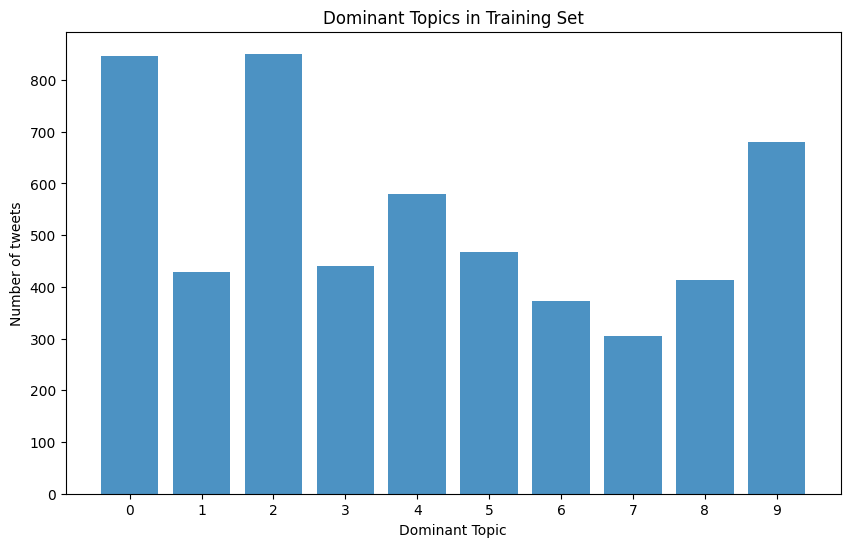

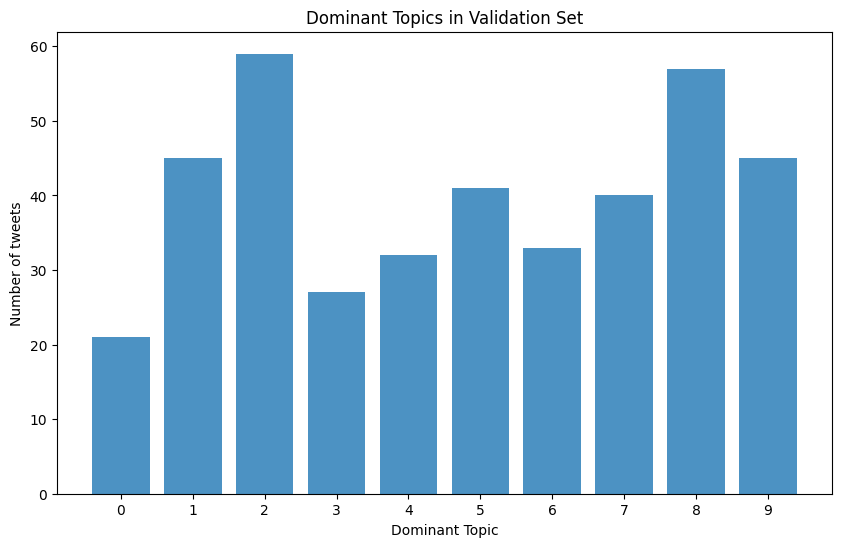

In [ ]:
import matplotlib.pyplot as plt

def plot_dominant_topics(dataframe, title):
    """
    Plot the dominant topics from the dataframe.

    Parameters:
        dataframe (pandas.DataFrame): The dataframe containing the 'dominant_topic' column.
        title (str): The title of the plot.

    Returns:
        None: Displays the bar plot of the dominant topics.
    """
    topic_counts = dataframe['dominant_topic'].value_counts()
    topic_counts = topic_counts.sort_index()
    topics = range(len(topic_counts))

    plt.figure(figsize=(10, 6))
    plt.bar(topics, topic_counts, align='center', alpha=0.8)
    plt.xticks(topics, topic_counts.index)
    plt.xlabel('Dominant Topic')
    plt.ylabel('Number of tweets')
    plt.title(title)
    plt.show()


# Plot dominant topics for the training set
plot_dominant_topics(balanced_df, 'Dominant Topics in Training Set')

# Plot dominant topics for the validation set
plot_dominant_topics(val_df, 'Dominant Topics in Validation Set')

**Interactive topic model visualization**

In [ ]:
#pip install pyLDAvis


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

# Visualize the LDA model results for the training set
vis_train = gensimvis.prepare(ldamodel_train, corpus_train, dictionary_train)
pyLDAvis.display(vis_train)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


**Let's see 10 of the 20 topics and the 15 top words for each in the train data.**

In [ ]:
ldamodel_train.print_topics(20, num_words=15)[:10]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.072*"user" + 0.043*"’" + 0.027*"fuck" + 0.021*"shit" + 0.018*"people" + 0.017*"like" + 0.014*"u" + 0.011*"say" + 0.011*"want" + 0.010*"get" + 0.010*"without" + 0.010*"go" + 0.009*"bro" + 0.008*"complete" + 0.008*"hell"'),
 (1,
  '0.060*"user" + 0.025*"shit" + 0.016*"good" + 0.014*"fuck" + 0.014*"start" + 0.014*"“" + 0.013*"”" + 0.013*"guy" + 0.013*"end" + 0.013*"lol" + 0.012*"oh" + 0.012*"run" + 0.011*"still" + 0.011*"business" + 0.011*"said"'),
 (2,
  '0.183*"user" + 0.015*"know" + 0.013*"never" + 0.010*"must" + 0.010*"well" + 0.009*"thing" + 0.009*"nt" + 0.008*"learn" + 0.008*"really" + 0.008*"idea" + 0.008*"much" + 0.007*"democrat" + 0.007*"stupid" + 0.007*"lying" + 0.007*"record"'),
 (3,
  '0.028*"like" + 0.025*"user" + 0.024*"as" + 0.024*"nigga" + 0.024*"person" + 0.021*"’" + 0.020*"watch" + 0.018*"would" + 0.017*"fucking" + 0.016*"way" + 0.016*"shit" + 0.014*"even" + 0.014*"dm" + 0.014*"whole" + 0.013*"know"'),
 (4,
  '0.044*"user" + 0.034*"bitch" + 0.030*"friend" + 0.0

**10 topics for each data value is calculated and dominant topic is chosen for each.**

## Self-Organizing Map

**The SOM grid and data points connected to each document are visualised using this function. A distance map of the SOM grid is displayed, and data points are plotted on the grid according to the relevant BMUs. Red ('ro') and blue ('bo') are used to denote 'OFF' class documents and 'NOT' class documents, respectively, in the data.**

In [ ]:
import matplotlib.pyplot as plt

def plot_som(som, corpus_matrix, bmus, y_train):
    """
    This function is used to visualize the Self-Organizing Map (SOM) grid and associated data points, the Best Matching Units (BMUs).

    Parameters:
        som: A trained Self-Organizing Map object.
        corpus_matrix (numpy.array): The matrix of topic probabilities for each document.
        bmus (numpy.array): = coordinates of each document in the SOM grid.
        y_train (pd.Series): The output labels for each data point.

    Returns:
        None
    """
    plt.figure(figsize=(10, 10))
    plt.pcolor(som.distance_map().T, cmap='bone_r')
    plt.colorbar()

    for i, x in enumerate(corpus_matrix):
        bmu_x, bmu_y = bmus[i]
        if y_train[i] == 0:
            plt.plot(bmu_x + 0.5, bmu_y + 0.5, 'ro', markersize=10)
        else:
            plt.plot(bmu_x + 0.5, bmu_y + 0.5, 'bo', markersize=10)

    plt.title('Self-Organizing Map')
    plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


**The below code uses SOM to arrange documents according to the probability of their dominating topics. This allows us to see and comprehend the topic distribution over the two-dimensional SOM grid.**

**SOM with learning rate = 0.5 and iterations = 100 is applied**

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


                                      preprocessed_text  dominant_topic  \
2752   one twitter jo pubg nai khelti  society accept                 6   
1841   user ’ rhino ass dead man walking  politicall...               9   
3085  ’ sugar factory many times shit overrated even...               6   
2988  yo rewatched fast ferocious 1010 classic fuck ...               1   
938   guys ’ attracted either biggest assholes married                5   
...                                                 ...             ...   
2911  hoes cross every real friend get social media ...               4   
3009               user ah crap would wiggle ass little               3   
387                      bitches act local think global               4   
210   took plunge tried clean spyware work machine f...               2   
3165                               begin get tired shit               4   

      bmu_x  bmu_y  
2752      0      1  
1841      0      6  
3085      0      1  
2988      1    

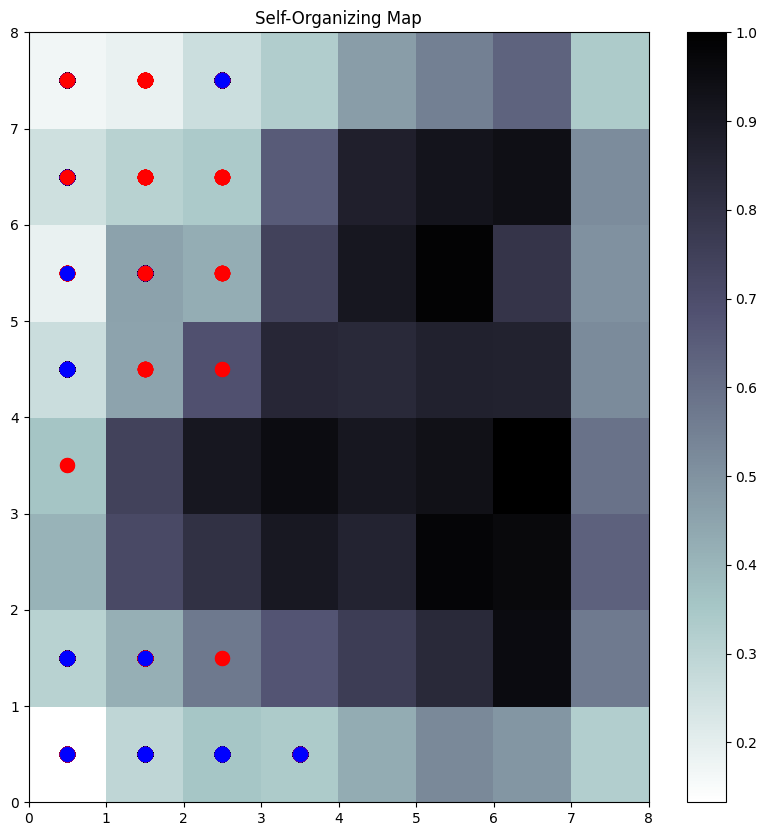

In [ ]:
from minisom import MiniSom
from sklearn.preprocessing import LabelEncoder
import joblib

# Convert the corpus to a matrix for SOM
num_topics = ldamodel_train.num_topics
corpus_matrix_train = np.zeros((len(corpus_train), num_topics))
corpus_matrix_val = np.zeros((len(corpus_val), num_topics))


for i, doc in enumerate(corpus_train):
    for topic, prob in ldamodel_train.get_document_topics(doc):
        corpus_matrix_train[i, topic] = prob

for i, doc in enumerate(corpus_val):
    for topic, prob in ldamodel_val.get_document_topics(doc):
        corpus_matrix_val[i, topic] = prob


# Define the SOM parameters
som_shape = (8, 8)  # Shape of the SOM grid
input_len = num_topics  # Number of features (topics)
sigma = 1.0  # Spread of the neighborhood function
learning_rate = 0.5  # Initial learning rate
iterations = 100  # Number of iterations

# Create and train the SOM
som = MiniSom(som_shape[0], som_shape[1], input_len, sigma=sigma, learning_rate=learning_rate)
som.train_random(corpus_matrix_train, iterations)

# Save the trained SOM
som_file = MODEL_2_DIRECTORY + '/som_model.sav'
joblib.dump(som, som_file, compress=0, protocol=None, cache_size=None)
# Get the SOM's output grid (weight vectors of each neuron)
som_weights = som.get_weights()

# Find the best matching unit (BMU) for each data point (row) in the corpus_matrix_val
bmus_val = np.array([som.winner(x) for x in corpus_matrix_val])
# Find the best matching unit (BMU) for each data point (row) in the corpus_matrix
bmus = np.array([som.winner(x) for x in corpus_matrix_train])


# Store the BMU for each data point in the training set
balanced_df['bmu_x'] = bmus[:, 0]
balanced_df['bmu_y'] = bmus[:, 1]
# Store the BMU for each data point in the validation set
val_df['bmu_x'] = bmus_val[:, 0]
val_df['bmu_y'] = bmus_val[:, 1]

# Convert string labels in the training set to numeric labels for machine learning models
label_encoder = LabelEncoder()
label_encoder.fit(balanced_df['label'])
y_train_encoded = label_encoder.transform(balanced_df['label'])

# Print the resulting DataFrame with dominant topic, BMU x, and BMU y for each data value
print(balanced_df[['preprocessed_text', 'dominant_topic', 'bmu_x', 'bmu_y']])

# Print the resulting DataFrame with dominant topic, BMU x, and BMU y for each data value for validation set
print(val_df[['preprocessed_text', 'dominant_topic', 'bmu_x', 'bmu_y']])

# Plot the SOM
plot_som(som, corpus_matrix_train, bmus, y_train_encoded)

**By mapping the documents in the corpus into the SOM grid using the BMU coordinates, it is possible to find document clusters and topic patterns in a lower-dimensional environment.**

In [ ]:
print(corpus_matrix_train)


[[0.01112315 0.12833096 0.01112339 ... 0.01112324 0.01112318 0.01112333]
 [0.01000134 0.01000103 0.01000311 ... 0.01000064 0.01000092 0.9099887 ]
 [0.01000096 0.01000117 0.01000046 ... 0.01000056 0.0100011  0.01000158]
 ...
 [0.01666818 0.01666926 0.0166673  ... 0.01666814 0.01667158 0.01666842]
 [0.         0.         0.57275867 ... 0.         0.         0.10422936]
 [0.02000377 0.02000414 0.02000149 ... 0.02000199 0.0200031  0.02000182]]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
print(corpus_matrix_train.shape)
print(num_topics)

(5386, 10)
10


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## K-Means Clustering

**Applying k-means 10 clusters. One for each topic is obtained having all data values.**

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

# Convert the corpus to a matrix for SOM
# The matrix should have the same number of columns as the number of topics in the LDA model
num_topics = ldamodel_train.num_topics
corpus_matrix = np.zeros((len(corpus_train), num_topics))
for i, doc in enumerate(corpus_train):
    for topic, prob in ldamodel_train.get_document_topics(doc):
        corpus_matrix[i, topic] = prob

# Apply k-means clustering with 10 clusters
kmeans = KMeans(n_clusters=2, random_state=seed)
balanced_df['topic_cluster'] = kmeans.fit_predict(corpus_matrix_train)
val_df['topic_cluster'] = kmeans.fit_predict(corpus_matrix_val)


# Print the resulting DataFrame with dominant topic, BMU x, BMU y, and topic cluster for each data value
print(balanced_df[['label','preprocessed_text', 'dominant_topic', 'bmu_x', 'bmu_y', 'topic_cluster']])
# Print the resulting DataFrame with dominant topic, BMU x, BMU y, and topic cluster for each data value
print(val_df[['label','preprocessed_text', 'dominant_topic', 'bmu_x', 'bmu_y', 'topic_cluster']])



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


     label                                  preprocessed_text  dominant_topic  \
2752   NOT   one twitter jo pubg nai khelti  society accept                 6   
1841   OFF   user ’ rhino ass dead man walking  politicall...               9   
3085   OFF  ’ sugar factory many times shit overrated even...               6   
2988   OFF  yo rewatched fast ferocious 1010 classic fuck ...               1   
938    NOT  guys ’ attracted either biggest assholes married                5   
...    ...                                                ...             ...   
2911   OFF  hoes cross every real friend get social media ...               4   
3009   OFF               user ah crap would wiggle ass little               3   
387    OFF                     bitches act local think global               4   
210    NOT  took plunge tried clean spyware work machine f...               2   
3165   OFF                               begin get tired shit               4   

      bmu_x  bmu_y  topic_c

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


**Calculating the F1 Score and accuracy of K-Means on the Validation Dataset**

In [ ]:
# Convert string labels in the training set to numeric labels for machine learning models
label_encoder = LabelEncoder()
label_encoder.fit(balanced_df['label'])
train_label = label_encoder.transform(balanced_df['label'])
label_encoder.fit(balanced_df['label'])
val_label = label_encoder.transform(val_df['label'])

train_pred_label = balanced_df['topic_cluster']
val_pred_label = val_df['topic_cluster']
train_f1_score = compute_performance(train_label, train_pred_label, split='train')

val_f1_score = compute_performance(val_label, val_pred_label, split='valid')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Computing different preformance metrics on train  set of Dataset
F1 Score(macro):  0.4342620559072995
Accuracy:  0.5029706646862235
Computing different preformance metrics on valid  set of Dataset
F1 Score(macro):  0.4639267366540094
Accuracy:  0.82


**The training set has an F1 score of 0.434, with a 0.553 accuracy, while the validation set has a 0.464 F1 score and 0.820 accuracy. The F1 score and accuracy for both the training and validation sets are neither very high nor extremely low. The results show that the K-means clustering approach captures some data trends.**

**Elbow Plot**

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init

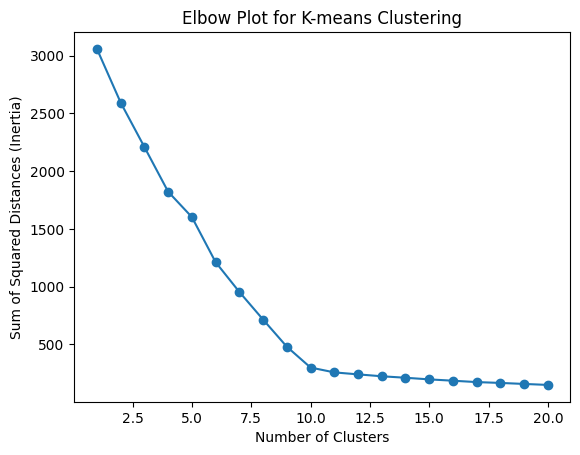

In [ ]:
import matplotlib.pyplot as plt

# Initialize the list to store inertia values
inertia_values = []

# Define a range of cluster numbers to try
num_clusters_range = range(1, 21)

# Calculate inertia for each number of clusters in the range
for num_clusters in num_clusters_range:
    kmeans = KMeans(n_clusters=num_clusters, random_state=seed)
    kmeans.fit(corpus_matrix)
    inertia_values.append(kmeans.inertia_)

# Plot the elbow plot
plt.plot(num_clusters_range, inertia_values, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distances (Inertia)')
plt.title('Elbow Plot for K-means Clustering')
plt.show()

**The elbow point in the plot occurs at 10 clusters, which indicates that using 10 clusters is a reasonable choice for your K-means clustering.But after experimenting with different numbers 2 gave better performance**

**Visualizing the clustering labels**

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


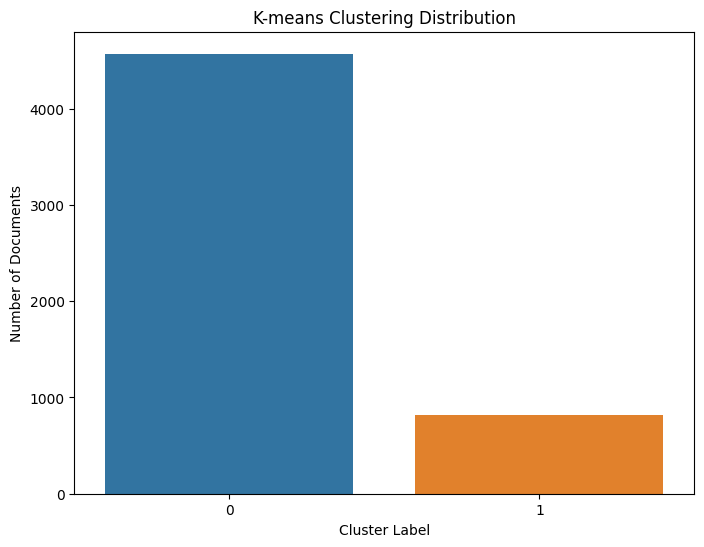

In [ ]:
import seaborn as sns

# Plot the distribution of K-means clustering labels
plt.figure(figsize=(8, 6))
sns.countplot(x='topic_cluster', data=balanced_df)
plt.xlabel("Cluster Label")
plt.ylabel("Number of Documents")
plt.title("K-means Clustering Distribution")
plt.show()

**Calculating and printing Log-likelihood and Perplexity scores for ldamodel**

In [ ]:
# Calculate Log-likelihood
log_likelihood = ldamodel_train.log_perplexity(corpus_train)
print("Log-likelihood:", log_likelihood)

# Calculate Perplexity
perplexity = 2**(-log_likelihood)
print("Perplexity:", perplexity)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Log-likelihood: -6.6141385094789875
Perplexity: 97.96119782246598


**LDA models show negative log-likelihood and low perplexity, indicating good prediction and topic structure capture.**

## Training Method Code
Your test code should be a stand alone code that must take `train_file`, `val_file`,  and `model_dir` as input. You could have other things as also input, but these three are must. You would load both files, and train using the `train_file` and validating using the `val_file`. You will `print` / `display`/ `plot` all performance metrics, loss(if available) and save the output model in the `model_dir`.

Note that at the testing time, you need to use the same pre-processing and model. So, it would be good that you make those as seperate function/pipeline whichever it the best suited for your method. Don't copy-paste same code twice, make it a fucntion/class whichever is best.

In [ ]:
def train_method(train_file, val_file, model_dir):
    """
     Takes train_file, val_file and model_dir as input.
     It trained on the train_file datapoints, and validate on the val_file datapoints.
     While training and validating, it print different evaluataion metrics and losses, wheverever necessary.
     After finishing the training, it saved the best model in the model_dir.

     ADD Other arguments, if needed.

    Args:
        train_file: Train file name
        val_file: Validation file name
        model_dir: Model output Directory

    """

    model_file, vectorizer_file = save_model(kmeans, count_vectorizer, model_dir)

    # Convert string labels in the training set to numeric labels for machine learning models
    label_encoder = LabelEncoder()
    label_encoder.fit(balanced_df['label'])
    train_label = label_encoder.transform(balanced_df['label'])
    label_encoder.fit(balanced_df['label'])
    val_label = label_encoder.transform(val_df['label'])

    train_pred_label = balanced_df['topic_cluster']
    val_pred_label = val_df['topic_cluster']
    train_f1_score = compute_performance(train_label, train_pred_label, split='train')

    val_f1_score = compute_performance(val_label, val_pred_label, split='valid')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
print('Train Unsupervised model')
train_method(train_file, val_file, MODEL_2_DIRECTORY)

Train Unsupervised model
Saved model to gdrive/MyDrive/./CE807-SU/Assignment2/2214000/models/2/model.sav


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Computing different preformance metrics on train  set of Dataset
F1 Score(macro):  0.4342620559072995
Accuracy:  0.5029706646862235
Computing different preformance metrics on valid  set of Dataset
F1 Score(macro):  0.4639267366540094
Accuracy:  0.82


#UnSupervised Method End (Method 1)

# Other Method/model Start

**Since all the above Unsupervised algorithms used do not  perform classification like supervised models, I am feeding the topic probabilities, corpus features, and additional features (bmu_x, bmu_y, topic_cluster) concatenated as input features for the following machine learning models.**

**Acknowledgment: The idea of feeding inputs of LDA topic disctributions was inspired by [2]. However, I concatenated topic probabilities, corpus features, and additional features (bmu_x, bmu_y, topic_cluster) to see how it works.**

## Trying different classifiers

## Random Forest model training

In [ ]:
def train_rf(X_train, y_train):
    """
    Train a Random Forest classifier on the given training data.

    Parameters:
        X_train (numpy.ndarray): Feature matrix for training data.
        y_train (numpy.ndarray): Numeric labels for the training data.

    Returns:
        RandomForestClassifier: Trained Random Forest classifier.
    """
    # Initialize and train the Random Forest model
    model = RandomForestClassifier(n_estimators=100, random_state=seed)
    model.fit(X_train, y_train)
    return model

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## MultinomialNB training

In [ ]:
from sklearn.naive_bayes import MultinomialNB

def train_mnb(X_train, y_train):
    """
    Train a Multinomial Naive Bayes classifier on the given training data.

    Parameters:
        X_train (numpy.ndarray): Feature matrix for training data.
        y_train (numpy.ndarray): Numeric labels for the training data.

    Returns:
        MultinomialNB: Trained Multinomial Naive Bayes classifier.
    """
    # Initialize and train the Multinomial Naive Bayes model
    model = MultinomialNB()
    model.fit(X_train, y_train)
    return model

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Support vector machine (SVM)

In [ ]:
def train_svm(X_train, y_train):
    """
    Train a Support Vector Machine (SVM) classifier on the given training data.

    Parameters:
        X_train (numpy.ndarray): Feature matrix for training data.
        y_train (numpy.ndarray): Numeric labels for the training data.

    Returns:
        SVC: Trained Support Vector Machine (SVM) classifier.
    """
    # Initialize and train the Support Vector Machine model
    model = SVC(kernel='linear', class_weight='balanced', probability=True)
    model.fit(X_train, y_train)
    return model


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Logistic Regression

In [ ]:
def train_lr(X_train, y_train):
    """
    Train a Logistic Regression classifier on the given training data.

    Parameters:
        X_train (numpy.ndarray): Feature matrix for training data.
        y_train (numpy.ndarray): Numeric labels for the training data.

    Returns:
        LogisticRegression: Trained Logistic Regression classifier.
    """
    # Initialize and train the Logistic Regression model
    model = LogisticRegression(class_weight='balanced', solver='newton-cg', fit_intercept=True)
    model.fit(X_train, y_train)
    return model


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from sklearn.neural_network import MLPClassifier

def train_mlp(X_train, y_train):
    """
    Function to train an MLP classifier.

    Args:
        X_train: Feature matrix of the training data.
        y_train: Target labels of the training data.

    Returns:
        Trained MLP classifier model.
    """
    # Create and train the MLP classifier
    model = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=200, random_state=seed)
    model.fit(X_train, y_train)

    return model


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


**For training and validation data, the 'train_methods' function generates feature matrices, does k-fold cross-validation, and converts string labels to numeric ones. The process then makes predictions, selects the best model based on the average F1 score, trains and assesses several classifiers, calculates feature importance, and saves the model for further use. The best model for categorising hate speech can be trained, tested, and saved using this pipeline.**

In [ ]:
def train_method_machine_learning(train_file, val_file, model_dir):
    """
    Takes train_file, val_file, and model_dir as input.
    It trains on the train_file datapoints and validates on the val_file datapoints.
    While training and validating, it prints different evaluation metrics and losses, wherever necessary.
    After finishing the training, it saves the best model in the model_dir.
    If test_file is provided, it makes predictions on the test data using the best model.

    Args:
        train_file: Train file name
        val_file: Validation file name
        model_dir: Model output Directory
    """

    # Create the feature matrices for training and validation data
    train_topic_probabilities = create_feature_matrix(ldamodel_train, corpus_train)
    val_topic_probabilities =create_feature_matrix(ldamodel_val, corpus_val)
    # Store the column names of the features
    train_feature_names = ['topic_prob_' + str(i) for i in range(train_topic_probabilities.shape[1])]
    val_feature_names = ['topic_prob_' + str(i) for i in range(val_topic_probabilities.shape[1])]
    train_val_feature_names = train_feature_names + ['corpus_feature_' + str(i) for i in range(corpus_matrix_train.shape[1])] + ['bmu_x', 'bmu_y']

    # Prepare the feature matrix for training and validation data
    X_train = np.hstack((train_topic_probabilities, corpus_matrix_train, balanced_df[['bmu_x', 'bmu_y', 'topic_cluster']].values))
    X_val = np.hstack((val_topic_probabilities, corpus_matrix_val, val_df[['bmu_x', 'bmu_y','topic_cluster']].values))

    # Convert string labels in the training set to numeric labels for machine learning models
    label_encoder = LabelEncoder()
    label_encoder.fit(balanced_df['label'])
    y_train_encoded = label_encoder.transform(balanced_df['label'])
    encoder_file = MODEL_2_DIRECTORY + '/label_encoder.pkl'
    save_label_encoder(label_encoder, encoder_file)
    # Define the number of splits for k-fold cross-validation
    n_splits = 2
    k_fold = KFold(n_splits=n_splits, random_state=seed, shuffle=True)

    # Define the classifiers to train and evaluate
    classifiers = {
        'Random Forest': train_rf,
        'MLP': train_mlp,
        'Multinomial Naive Bayes': train_mnb,
        'Support Vector Machine': train_svm,
        'Logistic Regression': train_lr
    }

    # Dictionary to store the F1 scores for each classifier
    f1_scores = {}
    trained_models = {}  # To store the trained models for each classifier

    # Loop through each classifier
    for classifier_name, train_function in classifiers.items():
        print(f'Let\'s start training {classifier_name} model')
        # List to store the F1 scores for each fold
        scores = []
        # Confusion matrix for this classifier
        confusion = np.zeros((2, 2))

        # Loop through each fold of the k-fold cross-validation
        for i, (train_indices, test_indices) in enumerate(k_fold.split(X_train)):
            # Get the training and validation data for this fold
            X_train_fold, X_val_fold = X_train[train_indices], X_train[test_indices]
            y_train_fold, y_val_fold = y_train_encoded[train_indices], y_train_encoded[test_indices]

            # Train the classifier using the training data for this fold
            model = train_function(X_train_fold, y_train_fold)

            # Make predictions on the validation data for this fold
            y_pred = model.predict(X_val_fold)

            # Calculate the F1 score for this fold and add it to the list of scores
            score = compute_performance(y_val_fold, y_pred, split='train')
            scores.append(score)

            # Update the confusion matrix for this classifier
            confusion += confusion_matrix(y_val_fold, y_pred)

            print(f'Fold {i+1}')
            print('Confusion Matrix:\n', confusion_matrix(y_val_fold, y_pred))
            # Store the trained model for this classifier
            trained_models[classifier_name] = model
            # Calculate permutation importance for the best model (Random Forest)
            if classifier_name == 'Random Forest':
                # Calculate permutation importance using the best trained model
                result = permutation_importance(model, X_val_fold, y_val_fold, n_repeats=10, random_state=seed)

                # Get the mean importance scores
                feature_importance = result.importances_mean
                feature_names = train_val_feature_names

                # Print or analyze the importance scores
                print(f"Feature Importance for {classifier_name}")
                for feature_name, importance in zip(feature_names, feature_importance):
                    print(f"{feature_name}: {importance:.4f}")
        # Calculate the average F1 score across all folds for this classifier
        avg_f1_score = np.mean(scores)
        f1_scores[classifier_name] = avg_f1_score

        print("=================")
        print(f'Total number of tweets: {len(X_train)}')
        print(f'Average F1 Score for {classifier_name}: {avg_f1_score:.3f}')
        print('Confusion Matrix:')
        print(confusion)

    # Print the F1 scores for all classifiers
    print("===== Overall F1 Scores =====")
    for classifier_name, f1_score in f1_scores.items():
        print(f'{classifier_name}: {f1_score:.3f}')

    # Find the best model based on the average F1 scores
    best_model = max(f1_scores, key=f1_scores.get)
    best_f1_score = f1_scores[best_model]

    print(f"\nBest Model: {best_model}")
    print(f"Best Average F1 Score: {best_f1_score:.3f}")
    # Get the best model
    best_model_final = trained_models[best_model]
    # Convert string labels in the validation set to numeric labels for machine learning models
    y_val_encoded = label_encoder.transform(val_df['label'])

    # Make predictions on the validation data using the best model
    y_val_pred = best_model_final.predict(X_val)

    # Calculate the performance metrics on the validation set
    val_f1_score = compute_performance(y_val_encoded, y_val_pred, split='validation')


    # Save the best model and vectorizer to the specified model directory
    model_file, vectorizer_file = save_model_machine_learning(trained_models[best_model], count_vectorizer, model_dir)



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
print('Training output with machine learning models')
train_method_machine_learning(train_file, val_file, MODEL_2_DIRECTORY)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Training output with machine learning models
Saved LabelEncoder to gdrive/MyDrive/./CE807-SU/Assignment2/2214000/models/2/label_encoder.pkl
Let's start training Random Forest model
Computing different preformance metrics on train  set of Dataset
F1 Score(macro):  0.9773484818713256
Accuracy:  0.9773486817675455
Fold 1
Confusion Matrix:
 [[1320   34]
 [  27 1312]]
Feature Importance for Random Forest
topic_prob_0: 0.0469
topic_prob_1: 0.0060
topic_prob_2: 0.0121
topic_prob_3: -0.0003
topic_prob_4: 0.0001
topic_prob_5: 0.0190
topic_prob_6: 0.0142
topic_prob_7: 0.0120
topic_prob_8: 0.0074
topic_prob_9: 0.0347
corpus_feature_0: 0.0205
corpus_feature_1: 0.0002
corpus_feature_2: 0.0075
corpus_feature_3: 0.0023
corpus_feature_4: 0.0190
corpus_feature_5: 0.0013
corpus_feature_6: 0.0155
corpus_feature_7: 0.0027
corpus_feature_8: 0.0017
corpus_feature_9: 0.0056
bmu_x: -0.0003
bmu_y: -0.0013
Computing different preformance metrics on train  set of Dataset
F1 Score(macro):  0.9714065796264864
Accu

**The training output displays multiple models performance, such as Support Vector Machine, Logistic Regression, Random Forest, and Multinomial Naive Bayes. The best classifier out of the evaluated classifiers is the Random Forest model, which has the greatest average F1 score on the training set. The top Random Forest model has an F1 score of 0.98 and an F1 Score (macro) of 0.424 in the validation set, suggesting its capacity to function on unseen data.**

## Hyper-tuning

**The train_methods_hypertuning function is an extension of the previous train_methods function. This new function incorporates hyperparameter tuning using GridSearchCV to find the best hyperparameters for each classifier and the best model is selected by determining the best model based on average F1 scores, selects it, makes predictions, computes performance metrics, and saves the best model and vectorizer to the specified model directory. It also computes the F1 score, stores the average F1 score, prints the confusion matrix, and stores the best model in the dictionary.**

In [ ]:
def train_methods_hypertuning(train_file, val_file, model_dir):
    """
    Takes train_file, val_file, and model_dir as input.
    It trains on the train_file datapoints and validates on the val_file datapoints.
    While training and validating, it prints different evaluation metrics and losses, wherever necessary.
    After finishing the training, it saves the best model in the model_dir.
    If test_file is provided, it makes predictions on the test data using the best model.

    Args:
        train_file: Train file name
        val_file: Validation file name
        model_dir: Model output Directory
    """
    # Create the feature matrices for training and validation data
    train_topic_probabilities = create_feature_matrix(ldamodel_train, corpus_train)
    val_topic_probabilities =create_feature_matrix(ldamodel_val, corpus_val)

    # Prepare the feature matrix for training and validation data
    X_train = np.hstack((train_topic_probabilities, corpus_matrix_train, balanced_df[['bmu_x', 'bmu_y', 'topic_cluster']].values))
    X_val = np.hstack((val_topic_probabilities, corpus_matrix_val, val_df[['bmu_x', 'bmu_y','topic_cluster']].values))

    # Convert string labels in the training set to numeric labels for machine learning models
    label_encoder = LabelEncoder()
    label_encoder.fit(balanced_df['label'])
    y_train_encoded = label_encoder.transform(balanced_df['label'])
    encoder_file = MODEL_2_DIRECTORY + '/label_encoder.pkl'
    save_label_encoder(label_encoder, encoder_file)
    # Define the number of splits for k-fold cross-validation
    n_splits = 2
    k_fold = KFold(n_splits=n_splits, random_state=seed, shuffle=True)

    # Define hyperparameter grids for each classifier
    rf_param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 5, 10],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }

    mnb_param_grid = {
        # Define hyperparameters for Multinomial Naive Bayes (if any)
        'alpha': [0.1, 0.5, 1.0]
    }

    svm_param_grid = {
        # Define hyperparameters for Support Vector Machine (if any)
        'C': [0.1, 1.0, 10.0],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto']
    }

    lr_param_grid = {
        # Define hyperparameters for Logistic Regression (if any)
        'C': [0.1, 1.0, 10.0],
        'solver': ['liblinear', 'lbfgs']
    }

    # Define the classifiers and their corresponding hyperparameter grids
    classifiers = {
        'Random Forest': (RandomForestClassifier(), rf_param_grid),
        'Multinomial Naive Bayes': (MultinomialNB(), mnb_param_grid),
        'Support Vector Machine': (SVC(), svm_param_grid),
        'Logistic Regression': (LogisticRegression(), lr_param_grid)
    }


    # Dictionary to store the F1 scores for each classifier
    f1_scores = {}
    trained_models = {}  # To store the trained models for each classifier

    # Loop through each classifier
    for classifier_name, (train_function, param_grid) in classifiers.items():
        print(f'Training {classifier_name}')
        # List to store the F1 scores for each fold
        scores = []
        # Confusion matrix for this classifier
        confusion = np.zeros((2, 2))

        # Loop through each fold of the k-fold cross-validation
        for i, (train_indices, test_indices) in enumerate(k_fold.split(X_train)):
            # Get the training and validation data for this fold
            X_train_fold, X_val_fold = X_train[train_indices], X_train[test_indices]
            y_train_fold, y_val_fold = y_train_encoded[train_indices], y_train_encoded[test_indices]

            # Perform hyperparameter tuning using GridSearchCV
            grid_search = GridSearchCV(train_function, param_grid, cv=k_fold, scoring='f1_macro')
            grid_search.fit(X_train_fold, y_train_fold)

            # Get the best model and its hyperparameters
            best_model = grid_search.best_estimator_
            best_params = grid_search.best_params_

            # Make predictions on the validation data for this fold
            y_pred = best_model.predict(X_val_fold)

            # Calculate the F1 score for this fold and add it to the list of scores
            score = compute_performance(y_val_fold, y_pred, split='train')
            scores.append(score)

            # Update the confusion matrix for this classifier
            confusion += confusion_matrix(y_val_fold, y_pred)

            print(f'Fold {i+1}')
            print('Confusion Matrix:\n', confusion_matrix(y_val_fold, y_pred))

        # Calculate the average F1 score across all folds for this classifier
        avg_f1_score = np.mean(scores)
        f1_scores[classifier_name] = avg_f1_score

        print("=================")
        print(f'Total number of tweets: {len(X_train)}')
        print(f'Average F1 Score for {classifier_name}: {avg_f1_score:.3f}')
        print('Confusion Matrix:')
        print(confusion)

        # Store the trained model for this classifier
        trained_models[classifier_name] = best_model


    # Print the F1 scores for all classifiers
    print("===== Overall F1 Scores =====")
    for classifier_name, f1_score in f1_scores.items():
        print(f'{classifier_name}: {f1_score:.3f}')

    # Find the best model based on the average F1 scores
    best_model = max(f1_scores, key=f1_scores.get)
    best_f1_score = f1_scores[best_model]

    print(f"\nBest Model: {best_model}")
    print(f"Best Average F1 Score: {best_f1_score:.3f}")
    # Get the best model
    best_model_final = trained_models[best_model]
    # Convert string labels in the validation set to numeric labels for machine learning models
    y_val_encoded = label_encoder.transform(val_df['label'])

    # Make predictions on the validation data using the best model
    y_val_pred = best_model_final.predict(X_val)

    # Calculate the performance metrics on the validation set
    val_f1_score = compute_performance(y_val_encoded, y_val_pred, split='validation')

    # Save the best model and vectorizer to the specified model directory
    model_file, vectorizer_file = save_model_hypertuning(trained_models[best_model], count_vectorizer, model_dir)



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
print('Training output')
train_methods_hypertuning(train_file, val_file, MODEL_2_DIRECTORY)

Training output


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Saved LabelEncoder to gdrive/MyDrive/./CE807-SU/Assignment2/2214000/models/2/label_encoder.pkl
Training Random Forest
Computing different preformance metrics on train  set of Dataset
F1 Score(macro):  0.9758607398642895
Accuracy:  0.9758633494244338
Fold 1
Confusion Matrix:
 [[1328   39]
 [  26 1300]]
Computing different preformance metrics on train  set of Dataset
F1 Score(macro):  0.9791984604366877
Accuracy:  0.9792053471964351
Fold 2
Confusion Matrix:
 [[1294   32]
 [  24 1343]]
Total number of tweets: 5386
Average F1 Score for Random Forest: 0.978
Confusion Matrix:
[[2622.   71.]
 [  50. 2643.]]
Training Multinomial Naive Bayes
Computing different preformance metrics on train  set of Dataset
F1 Score(macro):  0.5436912557685216
Accuracy:  0.545488303007798
Fold 1
Confusion Matrix:
 [[819 533]
 [691 650]]
Computing different preformance metrics on train  set of Dataset
F1 Score(macro):  0.5959048525885953
Accuracy:  0.5959896026735982
Fold 2
Confusion Matrix:
 [[822 519]
 [569 783]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Computing different preformance metrics on train  set of Dataset
F1 Score(macro):  0.6393560079932155
Accuracy:  0.6394355737096176
Fold 1
Confusion Matrix:
 [[841 510]
 [461 881]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Computing different preformance metrics on train  set of Dataset
F1 Score(macro):  0.6515922818384645
Accuracy:  0.6516895655402897
Fold 2
Confusion Matrix:
 [[855 487]
 [451 900]]
Total number of tweets: 5386
Average F1 Score for Logistic Regression: 0.645
Confusion Matrix:
[[1696.  997.]
 [ 912. 1781.]]
===== Overall F1 Scores =====
Random Forest: 0.978
Multinomial Naive Bayes: 0.570
Support Vector Machine: 0.774
Logistic Regression: 0.645

Best Model: Random Forest
Best Average F1 Score: 0.978
Computing different preformance metrics on validation  set of Dataset
F1 Score(macro):  0.39595288432497733
Accuracy:  0.55
Saved model to gdrive/MyDrive/./CE807-SU/Assignment2/2214000/models/2/hypertuned_model.sav
Saved Vectorizer to gdrive/MyDrive/./CE807-SU/Assignment2/2214000/models/2/vectorizer.sav


**The training output shows how different classifiers performed on the training dataset and how the validation dataset evaluated those classifiers. The procedure of hyperparameter tuning is performed to enhance each classifier. The best-performing model is the Random Forest classifier.The best model is saved to the designated model directory, along with the count_vectorizer used for feature extraction. The model's performance on the validation dataset is less after hyper-tuning.**

**Let's see how a simple NN works with these inputs**

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data

# Define the neural network model
class MLPClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(MLPClassifier, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x
# Function to predict labels using the trained neural network model
def predict_labels(model, data_loader):
    model.eval()
    all_predictions = []
    with torch.no_grad():
        for inputs, _ in data_loader:
            inputs = inputs.to('cpu')
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            all_predictions.extend(predicted.cpu().tolist())
    return all_predictions

def train_nn(X_train, y_train, X_val, y_val, input_size, hidden_size, num_classes, num_epochs=10, batch_size=64, lr=0.001):
    # Convert numpy arrays to PyTorch tensors
    X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
    y_train_tensor = torch.tensor(y_train, dtype=torch.long)
    X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
    y_val_tensor = torch.tensor(y_val, dtype=torch.long)

    # Create DataLoader for training data
    train_dataset = data.TensorDataset(X_train_tensor, y_train_tensor)
    train_loader = data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

    # Create DataLoader for validation data
    val_dataset = data.TensorDataset(X_val_tensor, y_val_tensor)
    val_loader = data.DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

    # Initialize the model
    model = MLPClassifier(input_size=input_size, hidden_size=hidden_size, num_classes=num_classes)

    # Define loss function and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)

    # Training loop
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model.to(device)
    for epoch in range(num_epochs):
        model.train()
        total_loss = 0
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()

        avg_train_loss = total_loss / len(train_loader)
        print(f"Epoch {epoch + 1}/{num_epochs}, Avg. Training Loss: {avg_train_loss:.4f}")

        # Validation
        model.eval()
        with torch.no_grad():
            total_val_loss = 0
            correct = 0
            total = 0
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                total_val_loss += loss.item()
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

            avg_val_loss = total_val_loss / len(val_loader)
            val_accuracy = 100 * correct / total
            print(f"Validation Loss: {avg_val_loss:.4f}, Validation Accuracy: {val_accuracy:.2f}%")

    return model

# Create the feature matrices for training and validation data
train_topic_probabilities = create_feature_matrix(ldamodel_train, corpus_train)
val_topic_probabilities =create_feature_matrix(ldamodel_val, corpus_val)

# Prepare the feature matrix for training and validation data
X_train = np.hstack((train_topic_probabilities, corpus_matrix_train, balanced_df[['bmu_x', 'bmu_y', 'topic_cluster']].values))
X_val = np.hstack((val_topic_probabilities, corpus_matrix_val, val_df[['bmu_x', 'bmu_y','topic_cluster']].values))

# Convert string labels in the training set to numeric labels for machine learning models
label_encoder = LabelEncoder()
label_encoder.fit(balanced_df['label'])
y_train_encoded = label_encoder.transform(balanced_df['label'])
y_val_encoded = label_encoder.transform(val_df['label'])
# Using the neural network to train
input_size = X_train.shape[1]
hidden_size = 128
num_classes = len(label_encoder.classes_)
# Training the neural network
nn_model = train_nn(X_train, y_train_encoded, X_val, y_val_encoded, input_size, hidden_size, num_classes, num_epochs=10, batch_size=64, lr=0.001)

# Create DataLoader for training data
train_dataset = data.TensorDataset(torch.tensor(X_train, dtype=torch.float32), torch.tensor(y_train_encoded, dtype=torch.long))
train_loader = data.DataLoader(train_dataset, batch_size=64, shuffle=False)

# Create DataLoader for validation data
val_dataset = data.TensorDataset(torch.tensor(X_val, dtype=torch.float32), torch.tensor(y_val_encoded, dtype=torch.long))
val_loader = data.DataLoader(val_dataset, batch_size=64, shuffle=False)

# Get predictions for training data
train_predictions = predict_labels(nn_model, train_loader)

# Get predictions for validation data
val_predictions = predict_labels(nn_model, val_loader)

# Compute F1 score for training data
train_f1_score = compute_performance(y_train_encoded, train_predictions, split='train')

# Compute F1 score for validation data
val_f1_score = compute_performance(y_val_encoded, val_predictions, split='validation')



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Epoch 1/10, Avg. Training Loss: 0.6743
Validation Loss: 0.7752, Validation Accuracy: 34.75%
Epoch 2/10, Avg. Training Loss: 0.6371
Validation Loss: 0.8299, Validation Accuracy: 38.50%
Epoch 3/10, Avg. Training Loss: 0.5958
Validation Loss: 0.8772, Validation Accuracy: 34.75%
Epoch 4/10, Avg. Training Loss: 0.5561
Validation Loss: 0.9609, Validation Accuracy: 27.00%
Epoch 5/10, Avg. Training Loss: 0.5266
Validation Loss: 0.8356, Validation Accuracy: 35.00%
Epoch 6/10, Avg. Training Loss: 0.5046
Validation Loss: 0.9656, Validation Accuracy: 30.25%
Epoch 7/10, Avg. Training Loss: 0.4844
Validation Loss: 1.0051, Validation Accuracy: 31.50%
Epoch 8/10, Avg. Training Loss: 0.4783
Validation Loss: 1.0916, Validation Accuracy: 26.50%
Epoch 9/10, Avg. Training Loss: 0.4687
Validation Loss: 0.9021, Validation Accuracy: 33.75%
Epoch 10/10, Avg. Training Loss: 0.4621
Validation Loss: 0.9753, Validation Accuracy: 32.50%
Computing different preformance metrics on train  set of Dataset
F1 Score(macro

##Other Method/model End

**Acknowlegments and References:**

1.   https://github.com/Michael-Ainsworth/twitter-hate-speech-detection/blob/main/Final_Project%20(1).ipynb (for data augmentation)

2.  https://towardsdatascience.com/unsupervised-nlp-topic-models-as-a-supervised-learning-input-cf8ee9e5cf28




